In [54]:
import pylab as pl

from common.statistics import *
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from matplotlib.figure import Figure
from matplotlib import rcParams

field = 7

marker_dict = {'UBr': "o", 'BAb':  "v", 'BTr': "<", 'BLb': ">"}
marker_colors = {'UBr': "red", 'BAb':  "blue", 'BTr': "green", 'BLb': "orange"}

data_file = f"stats_data_field_{field}.csv"
override = False

rcParams['axes.labelsize'] = 24
rcParams['axes.titlesize'] = 24
rcParams['xtick.labelsize'] = 24
rcParams['ytick.labelsize'] = 24
rcParams['legend.fontsize'] = 24


In [55]:
#Check if data file already exists
if os.path.isfile(data_file) and not override:
    print("Data file already exists")
    data = pd.read_csv(data_file)
else:
    analysis = AnalyzeStar(field)
    analysis.load_data()
    result = analysis.process_stars()
    result.to_csv(data_file)
    data = pd.read_csv(data_file)

Data file already exists


In [56]:
data

,Unnamed: 0,Starname,Field,Setup,Satellite,Merged,Filepath,V Magnitude,Spectral Type,RMS per orbit
0,0,HD63744,07-VelPup-I-2014,1,BTr,False,/Users/marco/Google Drive/Astroseismology/BRIT...,4.71,K,0.007575
1,1,HD63744,07-VelPup-I-2014,['1'],BTr,True,/Users/marco/Google Drive/Astroseismology/BRIT...,4.71,K,0.007575
2,2,HD63922,07-VelPup-I-2014,3,BTr,False,/Users/marco/Google Drive/Astroseismology/BRIT...,4.11,B,0.002854
3,3,HD63922,07-VelPup-I-2014,1,BAb,False,/Users/marco/Google Drive/Astroseismology/BRIT...,4.11,B,0.008629
4,4,HD63922,07-VelPup-I-2014,4,BAb,False,/Users/marco/Google Drive/Astroseismology/BRIT...,4.11,B,0.002713
...,...,...,...,...,...,...,...,...,...,...
336,336,HD86440,07-VelPup-I-2014,3,BAb,False,/Users/marco/Google Drive/Astroseismology/BRIT...,3.45,B,0.025537
337,337,HD86440,07-VelPup-I-2014,2,BAb,False,/Users/marco/Google Drive/Astroseismology/BRIT...,3.45,B,0.007093
338,338,HD86440,07-VelPup-I-2014,5,BTr,False,/Users/marco/Google Drive/Astroseismology/BRIT...,3.45,B,0.004038
339,339,HD86440,07-VelPup-I-2014,"['2', '3', '4', '5']",BTr,True,/Users/marco/Google Drive/Astroseismology/BRIT...,3.45,B,0.003688


In [57]:
use_only_merged_files = True

In [58]:
data = data[data["Merged"] == use_only_merged_files]

In [59]:
satellites = np.unique(data["Satellite"])
satellites

array(['BAb', 'BTr'], dtype=object)

In [60]:
data

,Unnamed: 0,Starname,Field,Setup,Satellite,Merged,Filepath,V Magnitude,Spectral Type,RMS per orbit
1,1,HD63744,07-VelPup-I-2014,['1'],BTr,True,/Users/marco/Google Drive/Astroseismology/BRIT...,4.710,K,0.007575
9,9,HD63922,07-VelPup-I-2014,"['3', '1']",BTr,True,/Users/marco/Google Drive/Astroseismology/BRIT...,4.110,B,0.003028
10,10,HD63922,07-VelPup-I-2014,"['1', '4', '5', '3', '2']",BAb,True,/Users/marco/Google Drive/Astroseismology/BRIT...,4.110,B,0.003221
16,16,HD64440,07-VelPup-I-2014,"['1', '2']",BAb,True,/Users/marco/Google Drive/Astroseismology/BRIT...,3.696,K,0.008240
17,17,HD64440,07-VelPup-I-2014,"['3', '2', '1']",BTr,True,/Users/marco/Google Drive/Astroseismology/BRIT...,3.696,K,0.001328
...,...,...,...,...,...,...,...,...,...,...
321,321,HD83183,07-VelPup-I-2014,"['3', '4', '1']",BTr,True,/Users/marco/Google Drive/Astroseismology/BRIT...,4.090,B,0.005505
328,328,HD83446,07-VelPup-I-2014,"['4', '5']",BAb,True,/Users/marco/Google Drive/Astroseismology/BRIT...,4.350,A,0.019315
329,329,HD83446,07-VelPup-I-2014,"['4', '1', '2', '3']",BTr,True,/Users/marco/Google Drive/Astroseismology/BRIT...,4.350,A,0.004087
339,339,HD86440,07-VelPup-I-2014,"['2', '3', '4', '5']",BTr,True,/Users/marco/Google Drive/Astroseismology/BRIT...,3.450,B,0.003688


In [61]:
#ignore all nan values in V Magnitude and Spectral type
data = data[np.isfinite(data["V Magnitude"])]
data

,Unnamed: 0,Starname,Field,Setup,Satellite,Merged,Filepath,V Magnitude,Spectral Type,RMS per orbit
1,1,HD63744,07-VelPup-I-2014,['1'],BTr,True,/Users/marco/Google Drive/Astroseismology/BRIT...,4.710,K,0.007575
9,9,HD63922,07-VelPup-I-2014,"['3', '1']",BTr,True,/Users/marco/Google Drive/Astroseismology/BRIT...,4.110,B,0.003028
10,10,HD63922,07-VelPup-I-2014,"['1', '4', '5', '3', '2']",BAb,True,/Users/marco/Google Drive/Astroseismology/BRIT...,4.110,B,0.003221
16,16,HD64440,07-VelPup-I-2014,"['1', '2']",BAb,True,/Users/marco/Google Drive/Astroseismology/BRIT...,3.696,K,0.008240
17,17,HD64440,07-VelPup-I-2014,"['3', '2', '1']",BTr,True,/Users/marco/Google Drive/Astroseismology/BRIT...,3.696,K,0.001328
...,...,...,...,...,...,...,...,...,...,...
321,321,HD83183,07-VelPup-I-2014,"['3', '4', '1']",BTr,True,/Users/marco/Google Drive/Astroseismology/BRIT...,4.090,B,0.005505
328,328,HD83446,07-VelPup-I-2014,"['4', '5']",BAb,True,/Users/marco/Google Drive/Astroseismology/BRIT...,4.350,A,0.019315
329,329,HD83446,07-VelPup-I-2014,"['4', '1', '2', '3']",BTr,True,/Users/marco/Google Drive/Astroseismology/BRIT...,4.350,A,0.004087
339,339,HD86440,07-VelPup-I-2014,"['2', '3', '4', '5']",BTr,True,/Users/marco/Google Drive/Astroseismology/BRIT...,3.450,B,0.003688


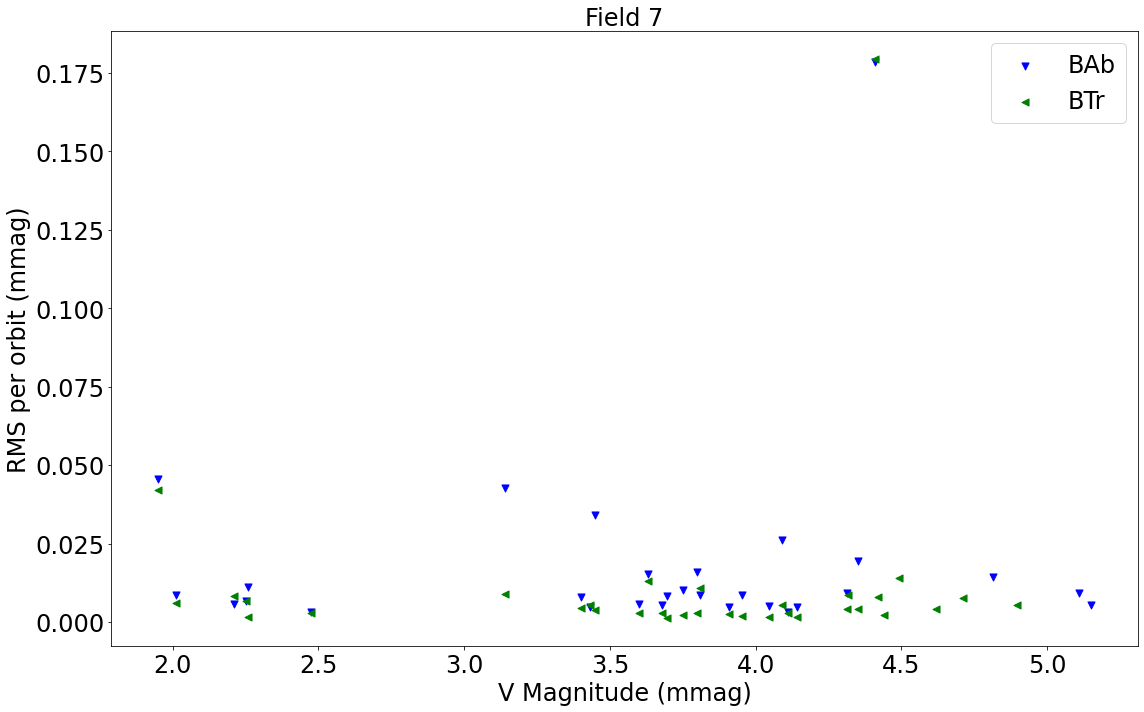

In [62]:
fig : Figure = plt.figure(figsize=(16,10))
ax : Axes = fig.add_subplot(111)

for satellite in satellites:
    data_satellite = data[data["Satellite"] == satellite]
    ax.scatter(data_satellite["V Magnitude"], data_satellite["RMS per orbit"], s=50, marker=marker_dict[satellite], color=marker_colors[satellite], label=satellite)
ax.set_xlabel("V Magnitude (mmag)")
ax.set_ylabel("RMS per orbit (mmag)")
pl.title(f"Field {field}")
plt.legend()
plt.tight_layout()
plt.savefig(f"field_{field}_rms_vs_vmag_{'merged_files' if use_only_merged_files else 'setups'}.png")

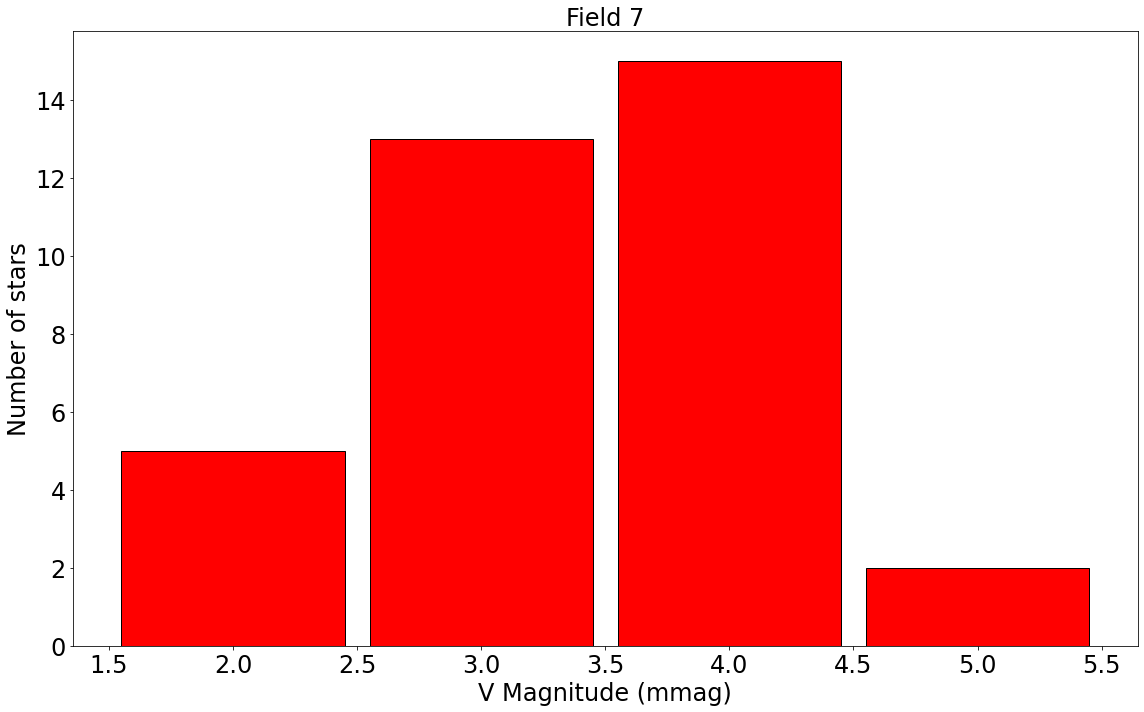

In [95]:
#filter data by unique stars
filtered_data = data.sort_index().groupby("Starname").first()
hist_data = filtered_data["V Magnitude"]
hist,bins = np.histogram(hist_data, bins=np.linspace(2,6,5))
fig : Figure = plt.figure(figsize=(16,10))
ax : Axes = fig.add_subplot(111)
ax.bar(bins[:-1],hist,color="red",edgecolor="black",width=bins[1]-bins[0] - 0.1)
ax.set_xlabel("V Magnitude (mmag)")
ax.set_ylabel("Number of stars")
pl.title(f"Field {field}")
plt.tight_layout()
plt.savefig(f"field_{field}_vmag_hist.png")

In [96]:
filtered_data = data.sort_index().groupby("Starname").first()
hist_data = filtered_data["Spectral Type"]
hist,bins = np.histogram(hist_data, bins=np.linspace(2,6,5))
fig : Figure = plt.figure(figsize=(16,10))
ax : Axes = fig.add_subplot(111)
ax.bar(bins[:-1],hist,color="red",edgecolor="black",width=bins[1]-bins[0] - 0.1)
ax.set_xlabel("Spectral Type")
ax.set_ylabel("Number of stars")
pl.title(f"Field {field}")
plt.tight_layout()
plt.savefig(f"field_{field}_spectral_type_hist.png")

TypeError: '<' not supported between instances of 'str' and 'float'

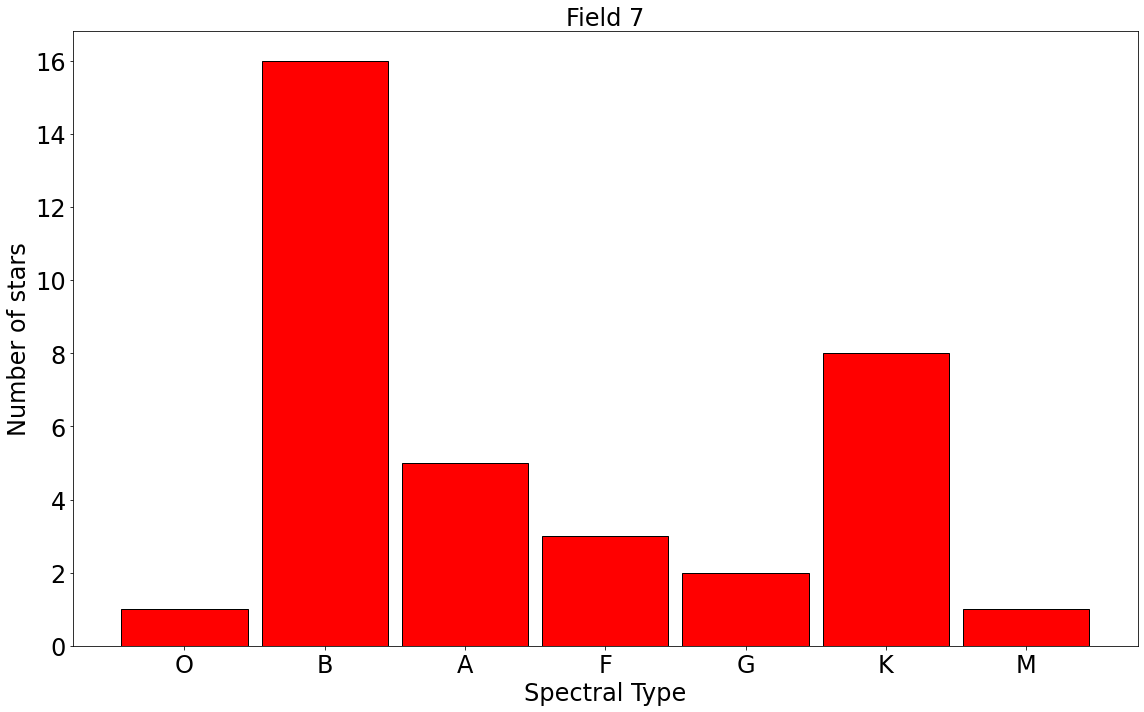

In [128]:
filtered_data = data.sort_index().groupby("Starname").first()
hist_data = filtered_data["Spectral Type"]
data_dict = {}
for i in hist_data:
    if i in data_dict:
        data_dict[i] += 1
    else:
        data_dict[i] = 1

spectral_order = ["O","B","A","F","G","K","M"]

x_values = []
y_values = []
for i in spectral_order:
    if i in data_dict:
        x_values.append(i)
        y_values.append(data_dict[i])

fig : Figure = plt.figure(figsize=(16,10))
ax : Axes = fig.add_subplot(111)
ax.bar(x_values,y_values,color="red",edgecolor="black",width=bins[1]-bins[0] - 0.1)
ax.set_xlabel("Spectral Type")
ax.set_ylabel("Number of stars")
pl.title(f"Field {field}")
plt.tight_layout()
plt.savefig(f"field_{field}_spectral_type_hist.png")

In [122]:
data_dict.keys(),x_values

(dict_keys(['K', 'B', 'O', 'A', 'G', 'F', 'M']), array([1, 2, 3, 4, 5, 6, 7]))